<a href="https://colab.research.google.com/github/kevinzciro/Final-DS/blob/main/proyecto2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto 2

## Clasificacion de señales de trafico

Los datos se pueden encontrar en: https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

Este dataset son mas de 5000 imagenes de señales de trafico, el datset y esta dividido en un conjunto de imagenes de prueba y de entrenamiento. El objetivo es clasificar las señales de trafico a traves de las imagenes que se tienen con un modelo de CNN. 

## Deteccion de fraudes con tarjetas de credito

Los datos se pueden encontrar en:https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

El dataset tiene 31 columnas, 28 de las cuales contienen informacion numerica despues de un analisis de componentes principales para mantener la informacion confidencial. La columna de tiempo contiene la cantidad de segundos transcurridos entre la primera fila del dataset y esa fila; la columna de cantidad es la cantidad de dinero en la transaccion. La columna de clase sera 1 si es un fraude y 0 si no lo es.

El objetivo es clasificar las transacciones para saber si es un fraude o no. El dataset esta muy desbalanceado, donde solo cerca del 2% son fraudes, el reto es construir un modelo de clasificacion que este bien a pesar de los pocos fraudes.

In [1]:
import pandas as pd
path = "/content/drive/MyDrive/Coding Dojo/Proyecto-2/creditcard.csv"

In [22]:
df = pd.read_csv(path)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## Exploracion datos

In [4]:
duplicated_rows = df.duplicated()
df[duplicated_rows]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282987,171288.0,1.912550,-0.455240,-1.750654,0.454324,2.089130,4.160019,-0.881302,1.081750,1.022928,...,-0.524067,-1.337510,0.473943,0.616683,-0.283548,-1.084843,0.073133,-0.036020,11.99,0
283483,171627.0,-1.464380,1.368119,0.815992,-0.601282,-0.689115,-0.487154,-0.303778,0.884953,0.054065,...,0.287217,0.947825,-0.218773,0.082926,0.044127,0.639270,0.213565,0.119251,6.82,0
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,...,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0


In [5]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Tenemos 1081 filas duplicadas pero no tenermos informacion nula en ninguna columna. Eliminemos los duplicados.

In [23]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     28

In [9]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


Hasta aqui todo parece estar bien. Como los datos ya pasaron por un proceso de PCA de antemano, seria mala idea descartar una columna ahora mismo. Miremos los valores unicos.

In [10]:
df.nunique()

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64

Hagamos una exploracion visual de los datos. Primero veamos el mapa de calor

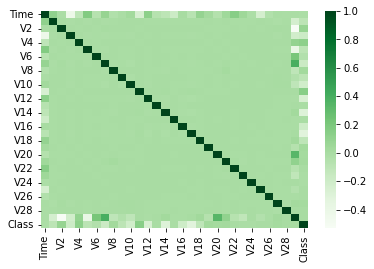

In [8]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, cmap = 'Greens');

Se alcanza a ver una correlacion bastante debil entre las columnas. Las mas fuertes serian entre V2 y Amount y entre Amount y V5 (correlacion negativa); entre V7 y Amount y entre V20 y Amount. Tambien se ven ciertas correlaciones con la columna de Class.

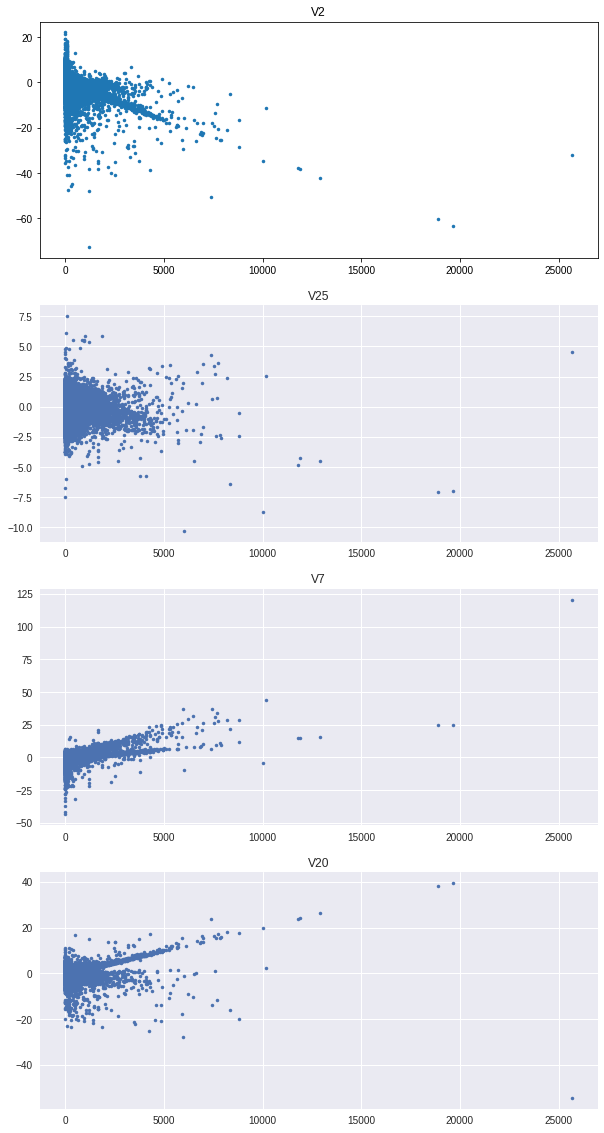

In [9]:
import matplotlib.pyplot as plt
import numpy as np

rows = 4
colums = 1
plt.figure(figsize=(10,20))

plt.subplot(rows, colums, 1)
plt.style.use('seaborn')
plt.title("V2")
plt.plot(df["Amount"],df["V2"], ".")

plt.subplot(rows, colums, 2)
plt.style.use('seaborn')
plt.title("V25")
plt.plot(df["Amount"],df["V25"], ".")

plt.subplot(rows, colums, 3)
plt.style.use('seaborn')
plt.title("V7")
plt.plot(df["Amount"],df["V7"], ".")

plt.subplot(rows, colums, 4)
plt.style.use('seaborn')
plt.title("V20")
plt.plot(df["Amount"],df["V20"], ".")

plt.show()

Las correlaciones son muy debiles en general, y como se ven en los graficos, los puntos demasiado dispersos para tener una idea muy clara de que es lo que esta pasando aqui. Como tampoco tenemos mucha informacion sobre las columnas V1 hasta la V28 estas correlaciones serian muy dificiles de interpretar.

Vamos a realizar primero una clasificacion con Arboles de decision y KNN. Empecemos importando las librerias que necesitamos.

In [6]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import set_config
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score, RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
set_config(display='diagram')

## Escalamiento y division en datos de entrenamiento y de prueba

La columna objetivo es la columna de Class, ya que queremos clasificar cuando una transaccion es fraudulenta o no.

In [24]:
X = df.drop(columns=['Class'])
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
print("Train data:")
print(f"Numero total de datos de entrenamiento: {len(y_train)}")
print(f"Numero total de fraudes en el entrenamiento: {len(np.where(y_train != 0)[0])}")
print(f"Porcentaje: {(len(np.where(y_train != 0)[0])/len(y_train))*100}")
print("Test data:")
print(f"Numero total de datos de prueba: {len(y_test)}")
print(f"Numero total de fraudes en la prueba: {len(np.where(y_test != 0)[0])}")
print(f"Porcentaje: {(len(np.where(y_test != 0)[0])/len(y_test))*100}")

Train data:
Numero total de datos de entrenamiento: 212794
Numero total de fraudes en el entrenamiento: 361
Porcentaje: 0.16964764044098987
Test data:
Numero total de datos de prueba: 70932
Numero total de fraudes en la prueba: 112
Porcentaje: 0.157897704844076


Como todas las columnas son numericas (debido al PCA) se realiza solo un escalamiento estandar. Lo pongo en un pipeline por si en un futuro deseo agregar otros tratamientos.

In [11]:
scaler = StandardScaler()
preprocessing_pipeline = make_pipeline(scaler)
preprocessing_pipeline

Pipeline(steps=[('standardscaler', StandardScaler())])

Se entrena el escalador y se ajustan los datos

In [25]:
preprocessing_pipeline.fit(X_train)

Pipeline(steps=[('standardscaler', StandardScaler())])

In [26]:
X_train_processed = preprocessing_pipeline.transform(X_train)
X_test_processed = preprocessing_pipeline.transform(X_test)

Verifiquemos como quedo el escalamiento

In [35]:
X_train_df = pd.DataFrame(X_train_processed, columns=X_train.columns)
X_train_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.535296,0.351762,-0.500795,0.593660,0.523703,-0.579075,0.516214,-0.527687,0.289567,1.563867,...,0.206726,0.089217,-0.086176,-0.072836,-0.584177,-0.337740,0.780781,-0.138826,0.109658,0.507208
1,-1.198654,-0.566635,0.624540,0.835329,-0.682127,-0.089419,0.417702,-0.681916,-2.100175,0.166423,...,0.975068,-1.707371,1.131440,-0.222373,-0.851765,-0.136106,2.138311,0.699143,0.612125,-0.289523
2,1.008918,1.006160,-0.370358,-0.225330,0.227813,-0.536617,-0.030047,-0.701278,0.176174,1.122688,...,-0.347990,0.253933,0.911894,0.214323,-0.617331,-0.628869,1.197337,-0.077707,-0.196924,-0.316746
3,1.492265,0.907519,0.154829,-0.149127,2.306478,0.782434,2.029608,-0.577631,0.615145,-0.776495,...,-0.331388,-0.149390,-0.281399,0.720081,-1.666967,-1.271195,-0.627499,0.141029,-0.136791,-0.350376
4,0.619802,0.961135,0.071901,-1.329142,0.767343,0.638958,-0.478144,0.657484,-0.286411,-0.507138,...,-0.048324,0.324910,0.793919,-0.098555,1.204835,0.844280,-1.130931,-0.125726,-0.157990,-0.010521


In [36]:
X_train_df.describe().round(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,212794.00,212794.00,212794.00,212794.00,212794.00,212794.00,212794.00,212794.00,212794.00,212794.00,...,212794.00,212794.00,212794.00,212794.00,212794.00,212794.00,212794.00,212794.00,212794.00,212794.00
mean,0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,...,0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.00,-29.07,-44.38,-32.01,-4.02,-82.06,-19.62,-35.20,-62.01,-12.26,...,-71.88,-48.40,-15.09,-71.52,-4.69,-19.73,-5.25,-56.99,-47.32,-0.35
25%,-0.86,-0.48,-0.36,-0.59,-0.60,-0.50,-0.57,-0.45,-0.18,-0.59,...,-0.28,-0.32,-0.75,-0.26,-0.59,-0.61,-0.68,-0.18,-0.16,-0.33
50%,-0.21,0.01,0.04,0.12,-0.01,-0.04,-0.21,0.03,0.02,-0.05,...,-0.08,-0.04,0.01,-0.02,0.07,0.03,-0.11,-0.00,0.03,-0.27
75%,0.94,0.67,0.49,0.68,0.52,0.44,0.30,0.46,0.28,0.55,...,0.17,0.26,0.73,0.23,0.73,0.67,0.50,0.22,0.24,-0.04
max,1.64,1.26,13.46,6.21,11.82,25.11,54.97,97.45,16.59,14.24,...,51.99,31.43,14.50,35.96,7.58,14.41,7.28,79.82,103.79,102.50


Todo va bien hasta aqui. Como sabemos, los arboles de decision no son un buen modelo para las clases desbalanceadas (como es nuestro caso); aun asi miremos que sale de este modelo:

In [38]:
df['Class'].value_counts(normalize = True)

0    0.998333
1    0.001667
Name: Class, dtype: float64

## Arboles de decision

In [42]:
dec_tree = DecisionTreeClassifier(random_state = 42, max_depth=10)
dec_tree.fit(X_train_processed, y_train)
dec_tree.predict(X_test_processed)

array([0, 0, 0, ..., 0, 0, 0])

In [43]:
train_score = dec_tree.score(X_train_processed, y_train)
test_score = dec_tree.score(X_test_processed, y_test)
print(train_score)
print(test_score)

0.9997650309689183
0.9994360796255569


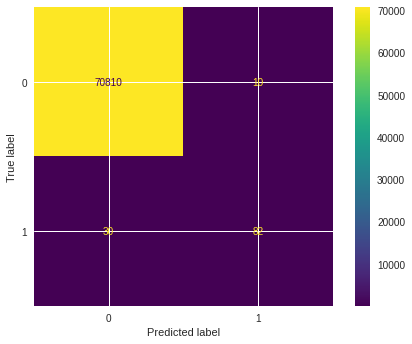

In [44]:
cm = confusion_matrix(y_test, dec_tree.predict(X_test_processed))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

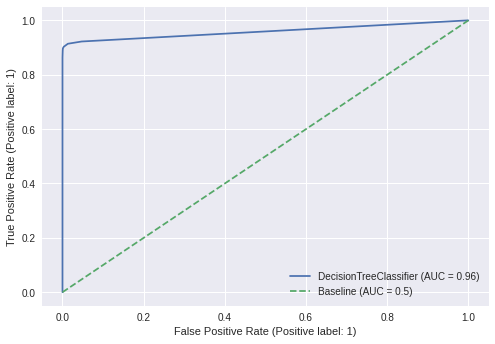

In [63]:
RocCurveDisplay.from_estimator(dec_tree, X_train_processed, y_train)
plt.plot([0, 1], [0, 1], ls = '--', label = 'Baseline (AUC = 0.5)')
plt.legend();

Aunque este resultado puede parecer bueno en un comienzo, hay que tener en mente que de nuestros datos de prueba, solo 112 eran fraudes, asi que si tenemos mas o menos 40 errores (entre falsos positivos y positivos falsos) eso quiere decir que podemos fallar un aproximadamente un 36% de las veces al clasificar una transaccion como fraudulenta.

## KNN

In [64]:
knn = KNeighborsClassifier(n_neighbors=7)
knn_pipe = make_pipeline(scaler, knn)
knn_pipe.fit(X_train, y_train)
predictions = knn_pipe.predict(X_test)

In [65]:
acc_score_test = knn_pipe.score(X_test, y_test)
acc_score_train = knn_pipe.score(X_train, y_train)
print(acc_score_train)
print(acc_score_test)

0.9995253625572149
0.999464275644279


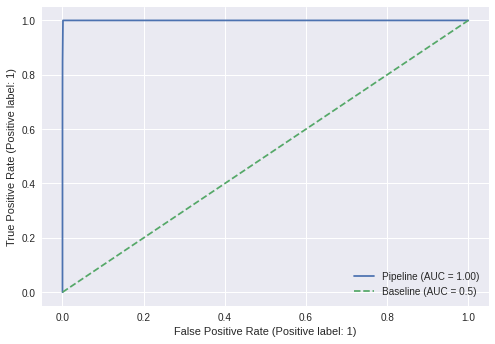

In [66]:
RocCurveDisplay.from_estimator(knn_pipe, X_train, y_train)
plt.plot([0, 1], [0, 1], ls = '--', label = 'Baseline (AUC = 0.5)')
plt.legend();

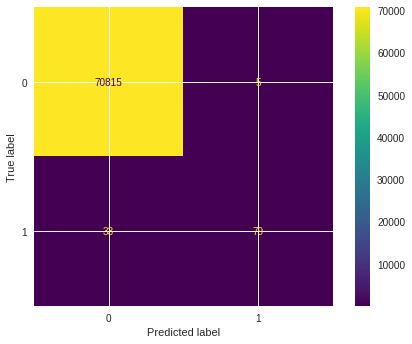

In [67]:
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Este caso arroja tambien una accuracy mayor al 99%. Pero igual que en el caso anterior si solo clasificamos 70 de los 112, obtenemos que el 37.5% de las veces no seremos capaces de predecir un fraude.

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [15]:
input_shape = X_train_processed.shape[1]
input_shape

30

In [16]:
# Sequential model
model = Sequential()

In [71]:
# First hidden layer
model.add(Dense(30, # How many neurons you have in your first hidden layer
                input_dim = input_shape, # What is the shape of your input features (number of columns)
                activation = 'relu')) # What activation function are you using?
# Second hidden layer
model.add(Dense(20, # How many neurons you have in your second hidden layer
                activation = 'relu')) # What activation function are you using?
model.add(Dense(10, # How many neurons you have in your second hidden layer
                activation = 'relu')) # What activation function are you using?

In [72]:
# Output layer
model.add(Dense(1, activation = 'sigmoid'))

In [73]:
# Step 2: Compile
model.compile(loss = 'bce', optimizer = 'adam')

In [74]:
# Step 3: Fit our model
history = model.fit(X_train_processed, y_train,
                    validation_data = (X_test_processed, y_test), 
                    epochs=100)

Epoch 1/100
6650/6650 [==============================] - 18s 3ms/step - loss: 0.0059 - val_loss: 0.0034
Epoch 2/100
6650/6650 [==============================] - 16s 2ms/step - loss: 0.0031 - val_loss: 0.0032
Epoch 3/100
6650/6650 [==============================] - 16s 2ms/step - loss: 0.0027 - val_loss: 0.0032
Epoch 4/100
6650/6650 [==============================] - 16s 2ms/step - loss: 0.0025 - val_loss: 0.0029
Epoch 5/100
6650/6650 [==============================] - 17s 3ms/step - loss: 0.0022 - val_loss: 0.0040
Epoch 6/100
6650/6650 [==============================] - 16s 2ms/step - loss: 0.0021 - val_loss: 0.0032
Epoch 7/100
6650/6650 [==============================] - 16s 2ms/step - loss: 0.0022 - val_loss: 0.0032
Epoch 8/100
6650/6650 [==============================] - 16s 2ms/step - loss: 0.0021 - val_loss: 0.0030
Epoch 9/100
6650/6650 [==============================] - 17s 3ms/step - loss: 0.0020 - val_loss: 0.0030
Epoch 10/100
6650/6650 [==============================] - 16s 2m

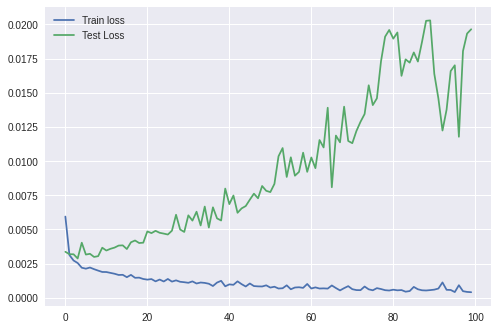

In [75]:
# Visualize the loss
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();

In [29]:
from tensorflow.keras.callbacks import EarlyStopping
# With early stopping
# Sequential model
model1 = Sequential()
# First hidden layer
model1.add(Dense(30, # How many neurons you have in your first hidden layer
                input_dim = input_shape, # What is the shape of your input features (number of columns)
                activation = 'relu')) # What activation function are you using?
# Second hidden layer
model1.add(Dense(20, # How many neurons you have in your second hidden layer
                activation = 'relu')) # What activation function are you using?
model1.add(Dense(10, # How many neurons you have in your second hidden layer
                activation = 'relu')) # What activation function are you using?
model1.add(Dense(1, activation = 'sigmoid'))
model1.compile(loss = 'bce', optimizer = 'adam')
early_stopping = EarlyStopping(patience = 10)
history = model1.fit(X_train_processed, y_train,
                    validation_data = (X_test_processed, y_test), 
                    epochs=100,
                    callbacks = [early_stopping])

Epoch 1/100
6650/6650 [==============================] - 21s 3ms/step - loss: 0.0076 - val_loss: 0.0033
Epoch 2/100
6650/6650 [==============================] - 20s 3ms/step - loss: 0.0029 - val_loss: 0.0031
Epoch 3/100
6650/6650 [==============================] - 22s 3ms/step - loss: 0.0026 - val_loss: 0.0032
Epoch 4/100
6650/6650 [==============================] - 20s 3ms/step - loss: 0.0025 - val_loss: 0.0031
Epoch 5/100
6650/6650 [==============================] - 20s 3ms/step - loss: 0.0023 - val_loss: 0.0033
Epoch 6/100
6650/6650 [==============================] - 20s 3ms/step - loss: 0.0023 - val_loss: 0.0028
Epoch 7/100
6650/6650 [==============================] - 20s 3ms/step - loss: 0.0021 - val_loss: 0.0030
Epoch 8/100
6650/6650 [==============================] - 19s 3ms/step - loss: 0.0021 - val_loss: 0.0030
Epoch 9/100
6650/6650 [==============================] - 21s 3ms/step - loss: 0.0020 - val_loss: 0.0030
Epoch 10/100
6650/6650 [==============================] - 20s 3m

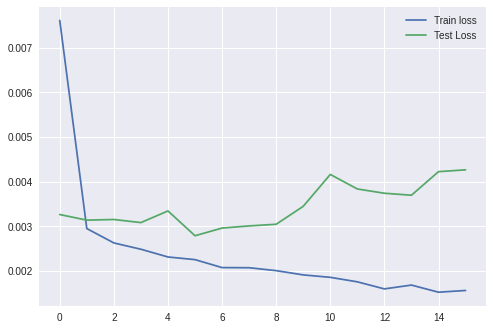

In [30]:
# Visualize the loss
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();

## K-Means

En este modelo usare solo 2 clusters. Uno seria el fraudulento y el otro no. 

In [36]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

X_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
X_scaled.head()

# Refit KMeans with 4 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)
# Add the clusters as a column in the dataframe
df['cluster'] = kmeans.labels_
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,cluster
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0


In [47]:
filter = df['cluster'] == df['Class']
df[filter]['Class'].count()

154616

In [49]:
154616/283726

0.5449482951862008

In [37]:
# Group the dataframe by cluster and aggregate by mean values
# Add as_index=False so that the clusters are a column, not the index
cluster_groups = df.groupby('cluster', as_index=False).mean()
cluster_groups

,cluster,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,58491.445118,-0.358371,0.007228,0.716435,0.129970,-0.248653,0.117350,-0.101176,0.060345,...,-0.043932,-0.122701,-0.046529,0.006534,0.166175,0.024253,0.001401,0.002891,94.225782,0.001932
1,1,138383.091786,0.442947,-0.017766,-0.855946,-0.162448,0.302325,-0.143289,0.125340,-0.074274,...,0.051889,0.147169,0.056256,-0.007368,-0.199868,-0.028767,0.002197,-0.002264,81.570802,0.001349


In [43]:
cluster_groups["Class"]

0    0.001932
1    0.001349
Name: Class, dtype: float64

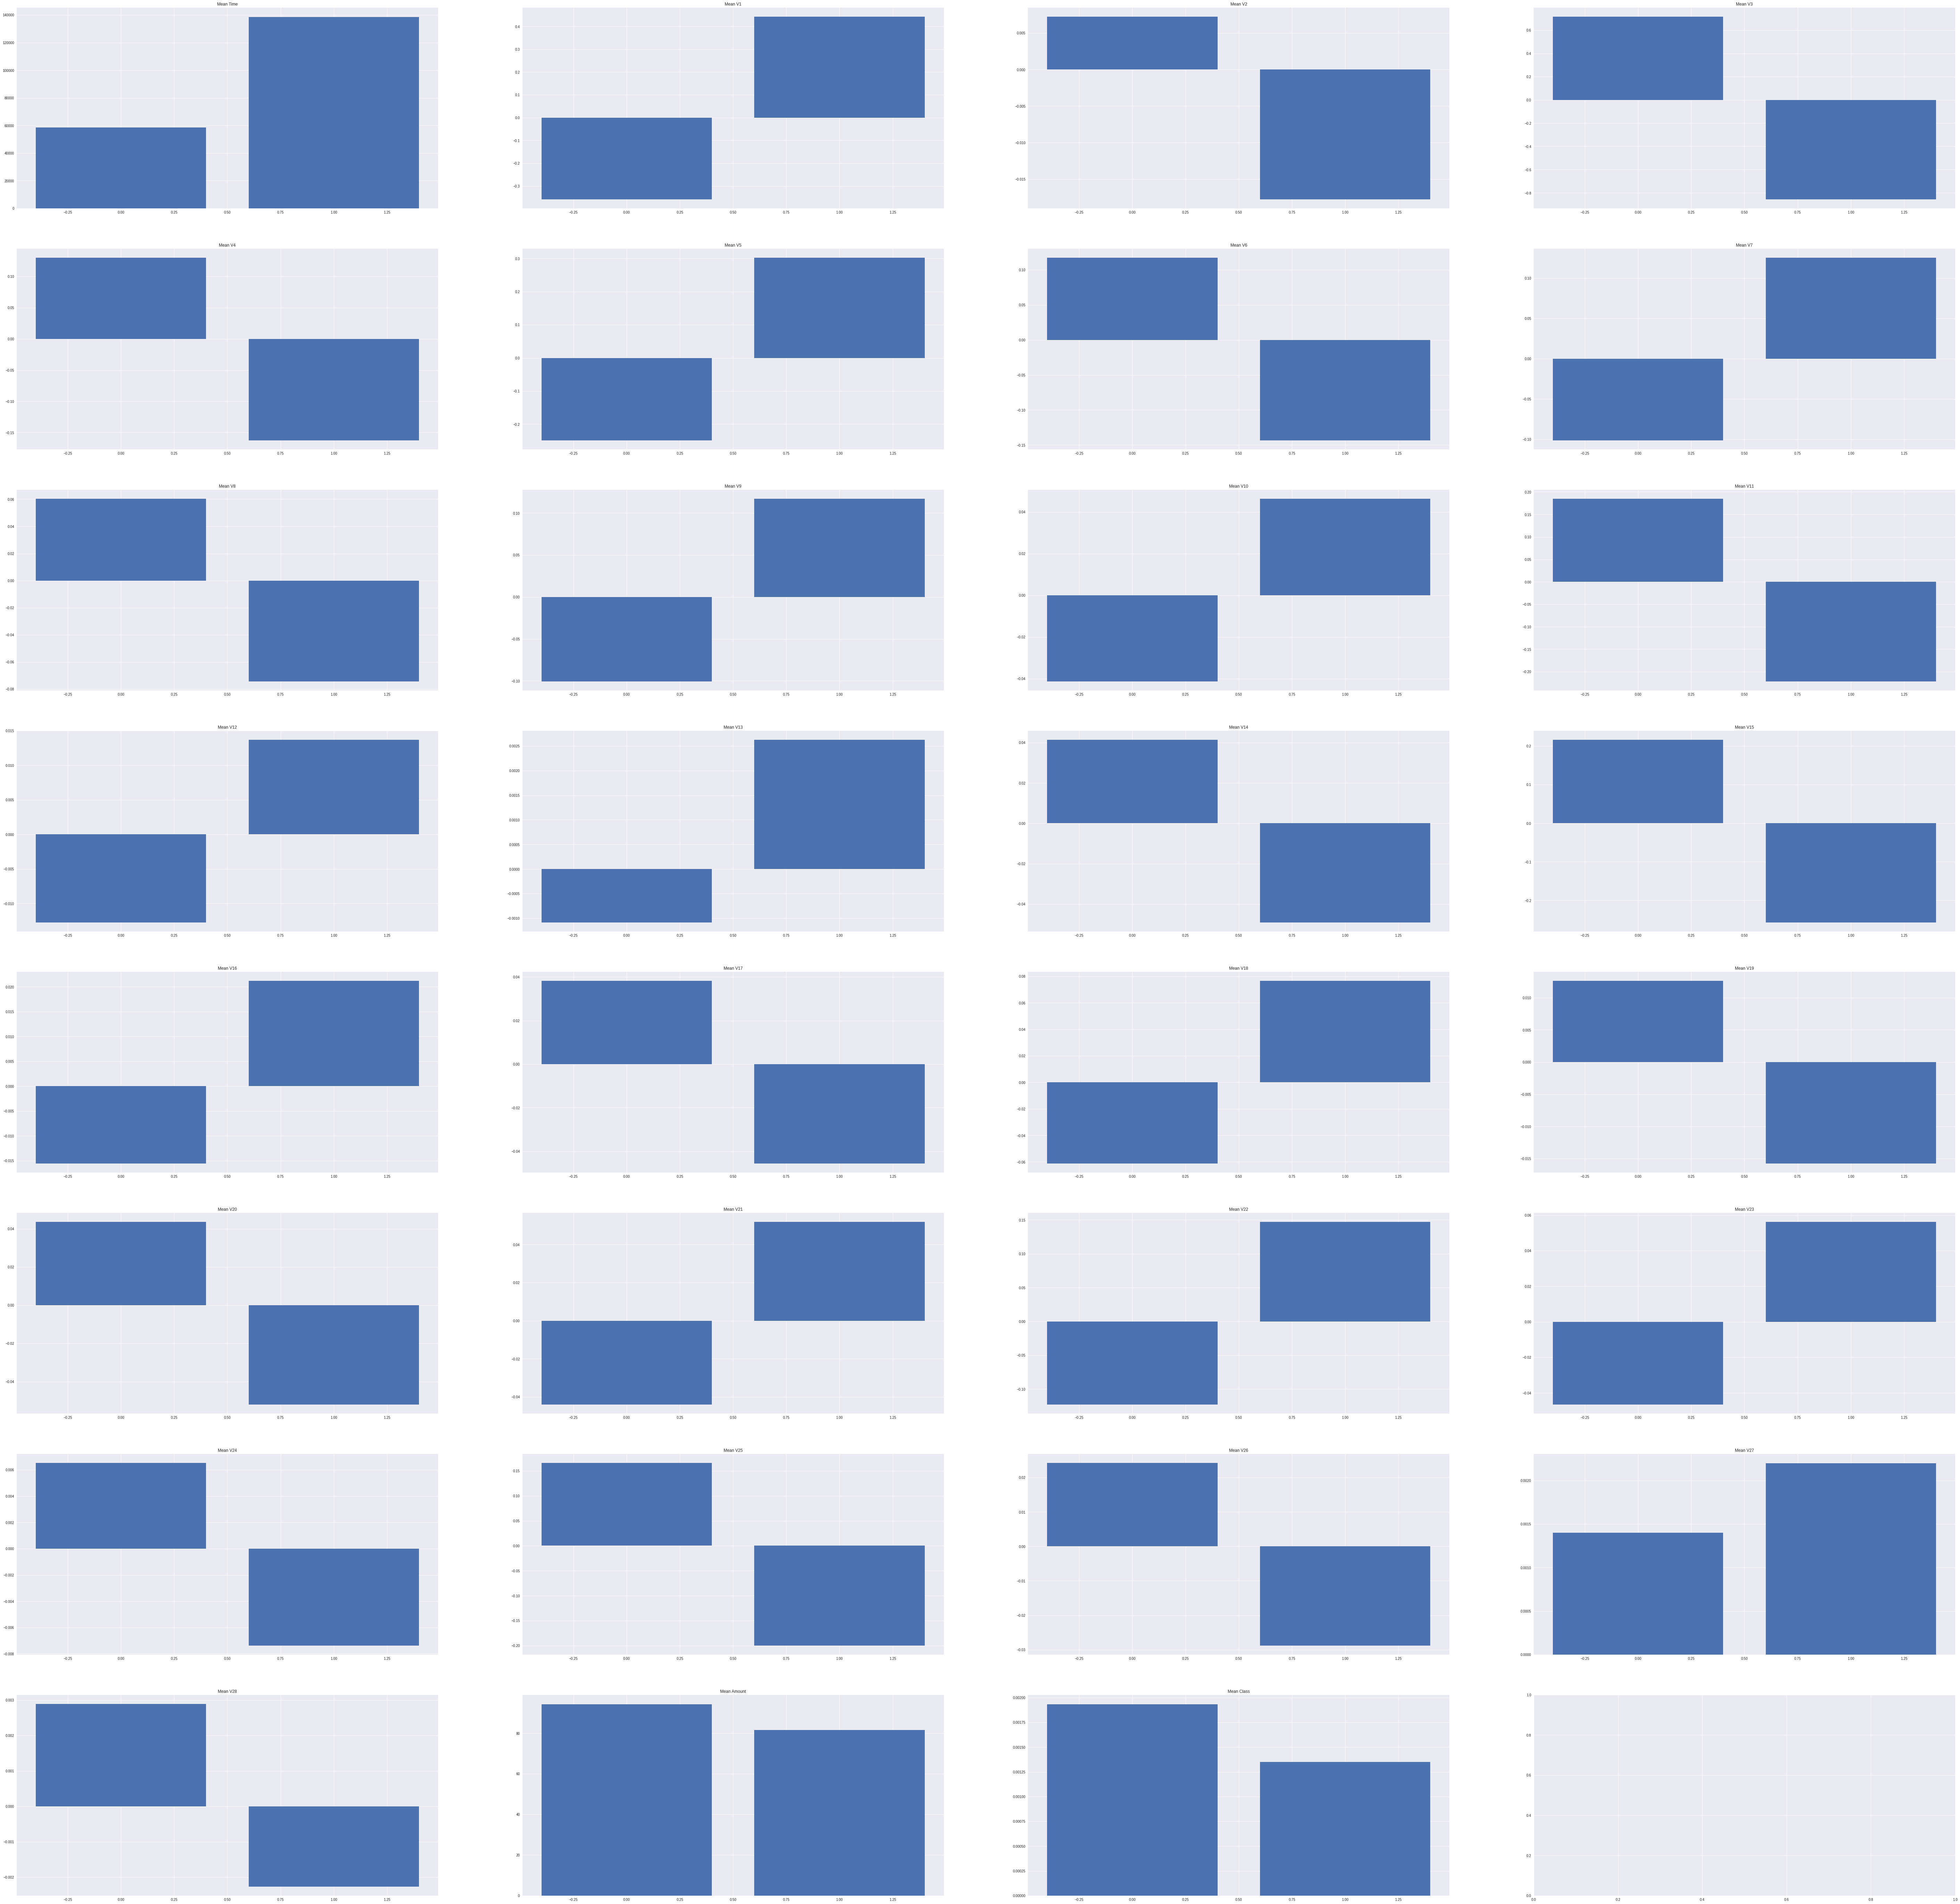

In [48]:
# Visualize means 
fig, axes = plt.subplots(8,4, figsize = (100, 100))
# fig is an array of dimensions 3,4.  axes.ravel() will flatten it to 12,1
axes = axes.ravel()
# Loop over columns and plot each in a separate figure, skip 'cluster' column
for i, col in enumerate(cluster_groups.columns[1:]):
  axes[i].bar(cluster_groups['cluster'], cluster_groups[col])
  axes[i].set_title(f'Mean {col}')